In [2]:
# Import needed libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [4]:
# Fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# Data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# Metadata
print(wholesale_customers.metadata)

# Variable information
print(wholesale_customers.variables)

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [6]:
# Concatenate features (X) and target (y) into a DataFrame
df = pd.concat([X, y], axis=1)
print(df)

     Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0          2  12669   9656     7561     214              2674        1338   
1          2   7057   9810     9568    1762              3293        1776   
2          2   6353   8808     7684    2405              3516        7844   
3          1  13265   1196     4221    6404               507        1788   
4          2  22615   5410     7198    3915              1777        5185   
..       ...    ...    ...      ...     ...               ...         ...   
435        1  29703  12051    16027   13135               182        2204   
436        1  39228   1431      764    4510                93        2346   
437        2  14531  15488    30243     437             14841        1867   
438        1  10290   1981     2232    1038               168        2125   
439        1   2787   1698     2510      65               477          52   

     Region  
0         3  
1         3  
2         3  
3         3  
4    

In [8]:
# Perform one-hot encoding using pandas
df_encoded = pd.get_dummies(df, columns=['Channel'])
print(df_encoded)

     Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  Region  \
0    12669   9656     7561     214              2674        1338       3   
1     7057   9810     9568    1762              3293        1776       3   
2     6353   8808     7684    2405              3516        7844       3   
3    13265   1196     4221    6404               507        1788       3   
4    22615   5410     7198    3915              1777        5185       3   
..     ...    ...      ...     ...               ...         ...     ...   
435  29703  12051    16027   13135               182        2204       3   
436  39228   1431      764    4510                93        2346       3   
437  14531  15488    30243     437             14841        1867       3   
438  10290   1981     2232    1038               168        2125       3   
439   2787   1698     2510      65               477          52       3   

     Channel_1  Channel_2  
0        False       True  
1        False       True  
2  

In [10]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop(columns=['Region']))  # Exclude the target variable
scaled_df = pd.DataFrame(scaled_features, columns=df_encoded.drop(columns=['Region']).columns)
print(scaled_df)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0    0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1   -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2   -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3    0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4    0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   
..        ...       ...       ...       ...               ...         ...   
435  1.401312  0.848446  0.850760  2.075222         -0.566831    0.241091   
436  2.155293 -0.592142 -0.757165  0.296561         -0.585519    0.291501   
437  0.200326  1.314671  2.348386 -0.543380          2.511218    0.121456   
438 -0.135384 -0.517536 -0.602514 -0.419441         -0.569770    0.213046   
439 -0.729307 -0.555924 -0.573227 -0.620094         -0.504888   -0.522869   

     Channel_1  Channel_2  
0    -1.448652   1.448652  
1    -1.448652   1.

In [12]:
# Concatenate scaled features and target
final_df = pd.concat([scaled_df, df_encoded['Region']], axis=1)
print(final_df)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0    0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1   -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2   -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3    0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4    0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   
..        ...       ...       ...       ...               ...         ...   
435  1.401312  0.848446  0.850760  2.075222         -0.566831    0.241091   
436  2.155293 -0.592142 -0.757165  0.296561         -0.585519    0.291501   
437  0.200326  1.314671  2.348386 -0.543380          2.511218    0.121456   
438 -0.135384 -0.517536 -0.602514 -0.419441         -0.569770    0.213046   
439 -0.729307 -0.555924 -0.573227 -0.620094         -0.504888   -0.522869   

     Channel_1  Channel_2  Region  
0    -1.448652   1.448652       3  
1  

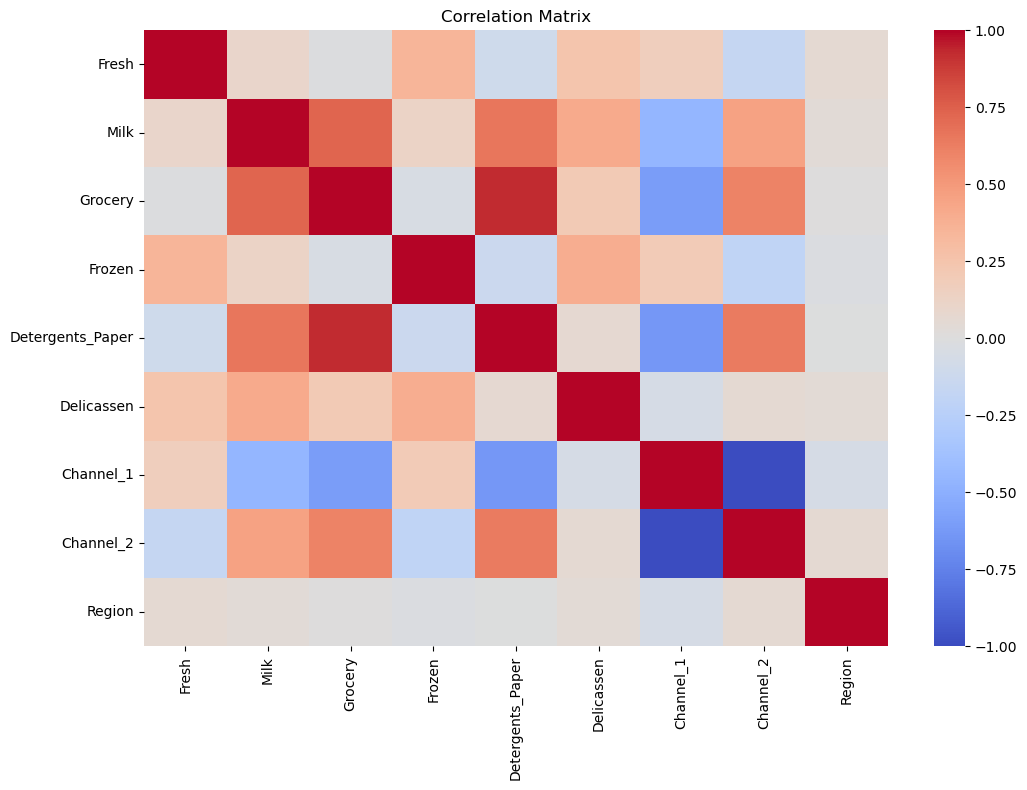

In [14]:
# Calculate correlation matrix
corr_matrix = final_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Focus on correlations with the target variable 'Region'
target_corr = corr_matrix['Region'].abs().sort_values(ascending=False)
print("Top 5 Correlated Frequencies with 'Region':")
print(target_corr[1:6])

Top 5 Correlated Frequencies with 'Region':
Channel_1     0.062028
Channel_2     0.062028
Fresh         0.055287
Delicassen    0.045212
Milk          0.032288
Name: Region, dtype: float64


In [19]:
# Split the data into features and labels
X = final_df.drop(columns=['Region'])
y = final_df['Region']

In [23]:
# Split into training and testing sets
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [27]:
# Create a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameters for grid search
param_grid = {
    'knn__n_neighbors': range(1, 31),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_cv, y_train_cv)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters:")
print(best_params)

Best parameters:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 16, 'knn__weights': 'uniform'}


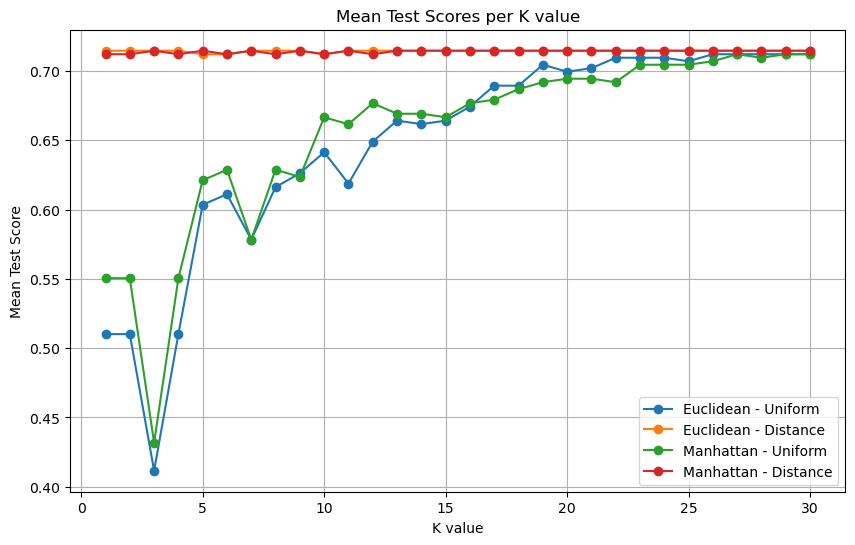

In [34]:
# Plot mean test scores per K value
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']
k_values = range(1, 31)

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores[:30], marker='o', linestyle='-', label='Euclidean - Uniform')
plt.plot(k_values, mean_test_scores[30:60], marker='o', linestyle='-', label='Euclidean - Distance')
plt.plot(k_values, mean_test_scores[60:90], marker='o', linestyle='-', label='Manhattan - Uniform')
plt.plot(k_values, mean_test_scores[90:], marker='o', linestyle='-', label='Manhattan - Distance')
plt.title('Mean Test Scores per K value')
plt.xlabel('K value')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# Final performance classification report and confusion matrix
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         3
           3       0.75      1.00      0.86        33

    accuracy                           0.75        44
   macro avg       0.25      0.33      0.29        44
weighted avg       0.56      0.75      0.64        44

Confusion Matrix:
[[ 0  0  8]
 [ 0  0  3]
 [ 0  0 33]]


C:\Users\isabe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isabe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\isabe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**The precision, recall, and F1-score for classes 1 and 2 are all 0, it indicates that the model failed to predict any instances of these classes correctly.**

In [45]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_cv, y_train_cv)

# Create a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Define parameters for grid search
param_grid = {
    'knn__n_neighbors': range(1, 31),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters:")
print(best_params)

# Final performance classification report and confusion matrix
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters:
{'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           1       0.12      0.25      0.17         8
           2       0.10      0.33      0.15         3
           3       0.61      0.33      0.43        33

    accuracy                           0.32        44
   macro avg       0.28      0.31      0.25        44
weighted avg       0.49      0.32      0.36        44

Confusion Matrix:
[[ 2  1  5]
 [ 0  1  2]
 [14  8 11]]


**The precision, recall, and F1-score for Class 1 and Class 2 are still relatively low.**